In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go


In [11]:
from sklearn.linear_model import LinearRegression

# Health Care

In [2]:
data_health = pd.read_csv("health_care.csv")
data_health

idade  custo
0     18    871
1     23   1132
2     28   1242
3     33   1356
4     38   1488
5     43   1638
6     48   2130
7     53   2454
8     58   3066
9     63   4090

In [3]:
x_health = data_health.iloc[:,0] #age
y_health = data_health.iloc[:,1] #health care cost

x_health, y_health

(0    18
 1    23
 2    28
 3    33
 4    38
 5    43
 6    48
 7    53
 8    58
 9    63
 Name: idade, dtype: int64,
 0     871
 1    1132
 2    1242
 3    1356
 4    1488
 5    1638
 6    2130
 7    2454
 8    3066
 9    4090
 Name: custo, dtype: int64)

In [4]:
np.corrcoef(x_health,y_health)

array([[1.        , 0.93091958],
       [0.93091958, 1.        ]])

In [9]:
x_health = x_health.values.reshape(-1,1)
x_health.shape

(10, 1)

In [12]:
regression_health = LinearRegression()
regression_health.fit(x_health,y_health)

LinearRegression()

In [13]:
#b0
regression_health.intercept_

-558.9490909090912

In [14]:
#b1
regression_health.coef_

array([61.86787879])

In [15]:
prediction = regression_health.predict(x_health)
prediction

array([ 554.67272727,  864.01212121, 1173.35151515, 1482.69090909,
       1792.03030303, 2101.36969697, 2410.70909091, 2720.04848485,
       3029.38787879, 3338.72727273])

In [16]:
y_health

0     871
1    1132
2    1242
3    1356
4    1488
5    1638
6    2130
7    2454
8    3066
9    4090
Name: custo, dtype: int64

In [22]:
plot = px.scatter(x = x_health.ravel(),
                  y = y_health)
plot.add_scatter(x = x_health.ravel(),
                 y = prediction,
                 name = "Health Care Regression")
plot.show()

In [25]:
regression_health.intercept_ + regression_health.coef_*x_health

array([[ 554.67272727],
       [ 864.01212121],
       [1173.35151515],
       [1482.69090909],
       [1792.03030303],
       [2101.36969697],
       [2410.70909091],
       [2720.04848485],
       [3029.38787879],
       [3338.72727273]])

In [32]:
#R^2
regression_health.score(x_health,y_health)

0.8666112727879174

In [30]:
from yellowbrick.regressor import ResidualsPlot

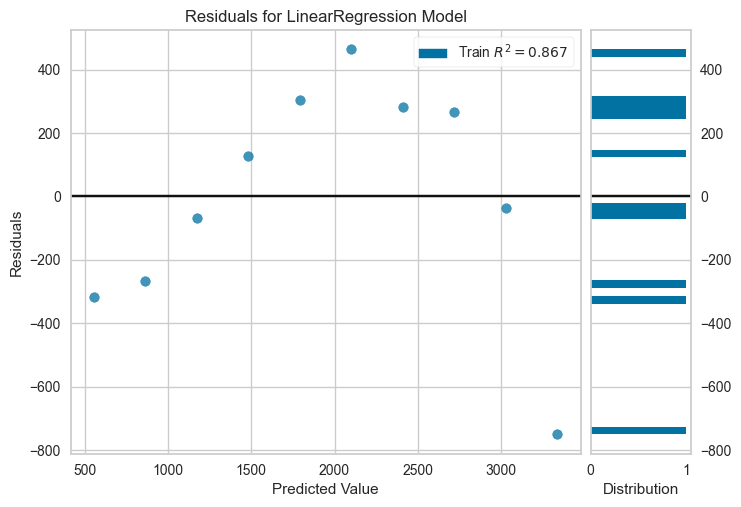

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [31]:
visualize = ResidualsPlot(regression_health)
visualize.fit(x_health,y_health)
visualize.poof()

# House prices

In [33]:
data_house = pd.read_csv("house_prices.csv")
data_house

id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242     2.0           0     0  ...      7   
2              770     10000     1.0           0     0  ...      6   
3             1960      5000     1.0           0     0  ...      7   
4             1680      8080     1.0           0     0  ...      8   
...            ...       ...     ...         ...   ...  ...    ...   
21608         1530      1131     3.0           0     0  ...      8   
21609         2310      5813     2.0           0     0  ...      8   
21610         1020      1350     2.0           0     0  ...      7   
21611         1600      2388     2.0           0     0  ...      8   
21612         1020      1076     2.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0            1180              0      1955             0    98178  47.5112   
1            2170            400      1951          1991    98125  47.7210   
2             770              0      1933             0    98028  47.7379   
3            1050            910      1965             0    98136  47.5208   
4            1680              0      1987             0    98074  47.6168   
...           ...            ...       ...           ...      ...      ...   
21608        1530              0      2009             0    98103  47.6993   
21609        2310              0      2014             0    98146  47.5107   
21610        1020              0      2009             0    98144  47.5944   
21611        1600              0      2004             0    98027  47.5345   
21612        1020              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
0     -122.257           1340        5650  
1     -122.319           1690        7639  
2     -122.233           2720        8062  
3     -122.393           1360        5000  
4     -122.045           1800        7503  
...        ...            ...         ...  
21608 -122.346           1530        1509  
21609 -122.362           1830        7200  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357  

[21613 rows x 21 columns]

In [34]:
data_house.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [35]:
data_house.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [39]:
data_house.iloc[:,2:20].corr()

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.308350   0.525138     0.702035  0.089661  0.256794   
bedrooms       0.308350  1.000000   0.515884     0.576671  0.031703  0.175429   
bathrooms      0.525138  0.515884   1.000000     0.754665  0.087740  0.500653   
sqft_living    0.702035  0.576671   0.754665     1.000000  0.172826  0.353949   
sqft_lot       0.089661  0.031703   0.087740     0.172826  1.000000 -0.005201   
floors         0.256794  0.175429   0.500653     0.353949 -0.005201  1.000000   
waterfront     0.266369 -0.006582   0.063744     0.103818  0.021604  0.023698   
view           0.397293  0.079532   0.187737     0.284611  0.074710  0.029444   
condition      0.036362  0.028472  -0.124982    -0.058753 -0.008958 -0.263768   
grade          0.667434  0.356967   0.664983     0.762704  0.113621  0.458183   
sqft_above     0.605567  0.477600   0.685342     0.876597  0.183512  0.523885   
sqft_basement  0.323816  0.303093   0.283770     0.435043  0.015286 -0.245705   
yr_built       0.054012  0.154178   0.506019     0.318049  0.053080  0.489319   
yr_renovated   0.126434  0.018841   0.050739     0.055363  0.007644  0.006338   
zipcode       -0.053203 -0.152668  -0.203866    -0.199430 -0.129574 -0.059121   
lat            0.307003 -0.008931   0.024573     0.052529 -0.085683  0.049614   
long           0.021626  0.129473   0.223042     0.240223  0.229521  0.125419   
sqft_living15  0.585379  0.391638   0.568634     0.756420  0.144608  0.279885   

               waterfront      view  condition     grade  sqft_above  \
price            0.266369  0.397293   0.036362  0.667434    0.605567   
bedrooms        -0.006582  0.079532   0.028472  0.356967    0.477600   
bathrooms        0.063744  0.187737  -0.124982  0.664983    0.685342   
sqft_living      0.103818  0.284611  -0.058753  0.762704    0.876597   
sqft_lot         0.021604  0.074710  -0.008958  0.113621    0.183512   
floors           0.023698  0.029444  -0.263768  0.458183    0.523885   
waterfront       1.000000  0.401857   0.016653  0.082775    0.072075   
view             0.401857  1.000000   0.045990  0.251321    0.167649   
condition        0.016653  0.045990   1.000000 -0.144674   -0.158214   
grade            0.082775  0.251321  -0.144674  1.000000    0.755923   
sqft_above       0.072075  0.167649  -0.158214  0.755923    1.000000   
sqft_basement    0.080588  0.276947   0.174105  0.168392   -0.051943   
yr_built        -0.026161 -0.053440  -0.361417  0.446963    0.423898   
yr_renovated     0.092885  0.103917  -0.060618  0.014414    0.023285   
zipcode          0.030285  0.084827   0.003026 -0.184862   -0.261190   
lat             -0.014274  0.006157  -0.014941  0.114084   -0.000816   
long            -0.041910 -0.078400  -0.106500  0.198372    0.343803   
sqft_living15    0.086463  0.280439  -0.092824  0.713202    0.731870   

               sqft_basement  yr_built  yr_renovated   zipcode       lat  \
price               0.323816  0.054012      0.126434 -0.053203  0.307003   
bedrooms            0.303093  0.154178      0.018841 -0.152668 -0.008931   
bathrooms           0.283770  0.506019      0.050739 -0.203866  0.024573   
sqft_living         0.435043  0.318049      0.055363 -0.199430  0.052529   
sqft_lot            0.015286  0.053080      0.007644 -0.129574 -0.085683   
floors             -0.245705  0.489319      0.006338 -0.059121  0.049614   
waterfront          0.080588 -0.026161      0.092885  0.030285 -0.014274   
view                0.276947 -0.053440      0.103917  0.084827  0.006157   
condition           0.174105 -0.361417     -0.060618  0.003026 -0.014941   
grade               0.168392  0.446963      0.014414 -0.184862  0.114084   
sqft_above         -0.051943  0.423898      0.023285 -0.261190 -0.000816   
sqft_basement       1.000000 -0.133124      0.071323  0.074845  0.110538   
yr_built           -0.133124  1.000000     -0.224874 -0.346869 -0.148122   
yr_renovated        0.071323 -0.224874      1

<Axes: >

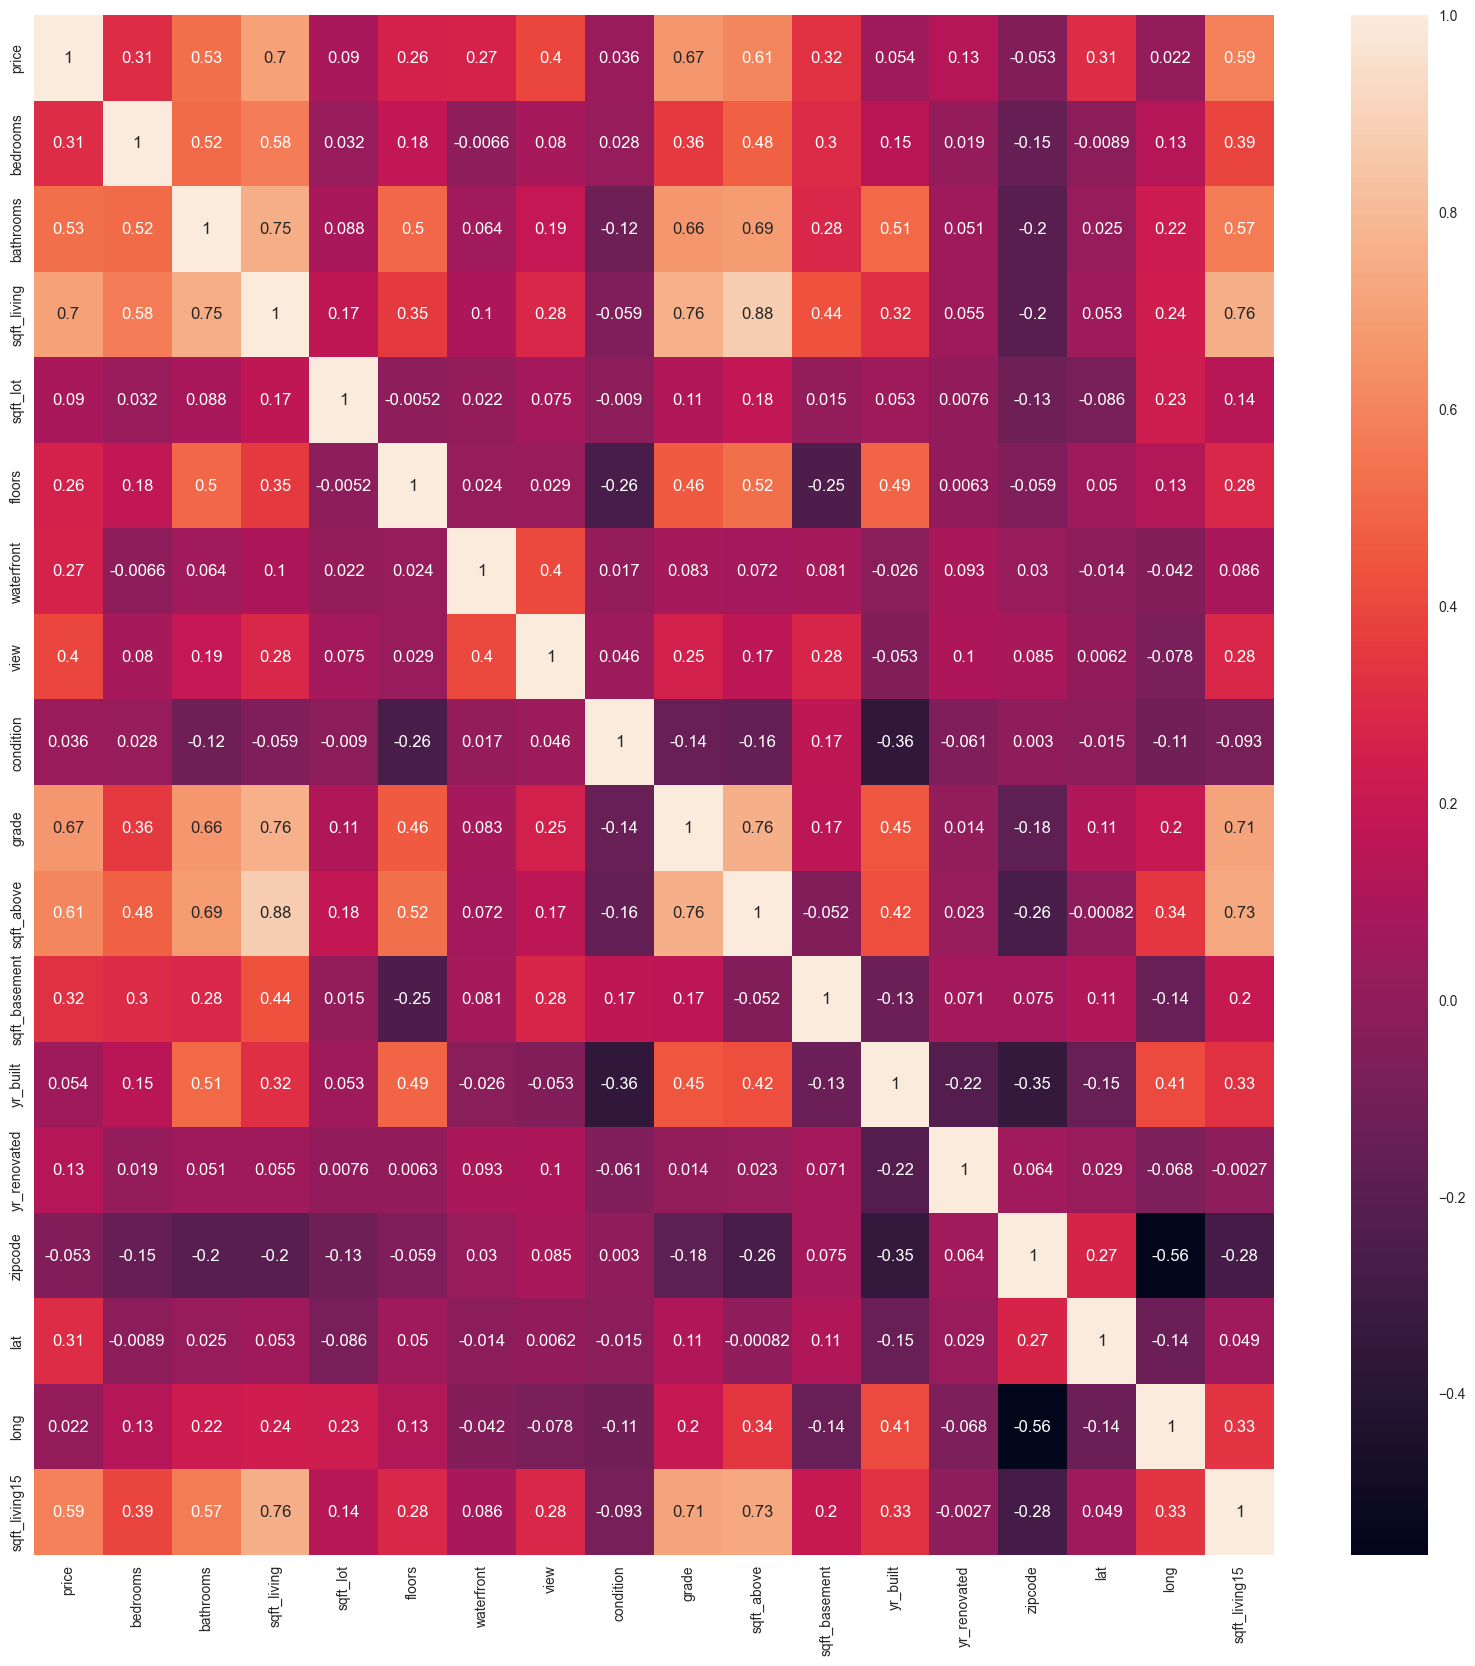

In [42]:
figure = plt.figure(figsize=(20,20))
sns.heatmap(data_house.iloc[:,2:20].corr(), annot=True)

In [45]:
x_house = data_house.iloc[:,5:6].values.reshape(-1,1) #sqft_living      
x_house

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]], dtype=int64)

In [46]:
y_house = data_house.iloc[:,2].values #price
y_house

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [47]:
from sklearn.model_selection import train_test_split

In [49]:
x_house_train, x_house_test, y_house_train, y_house_test = train_test_split(x_house,y_house,
                                                                            test_size=0.3,
                                                                            random_state=0)

In [50]:
x_house_train.shape, x_house_test.shape, y_house_train.shape, y_house_test.shape

((15129, 1), (6484, 1), (15129,), (6484,))

In [51]:
regression_house_simple = LinearRegression()
regression_house_simple.fit(x_house_train,y_house_train)

LinearRegression()

In [52]:
#b0
regression_house_simple.intercept_

-37893.59850106703

In [53]:
#b1
regression_house_simple.coef_

array([278.32860644])

In [54]:
#r^2
regression_house_simple.score(x_house_train,y_house_train)

0.49453356717789776

In [55]:
#r^2
regression_house_simple.score(x_house_test,y_house_test)

0.48889929019453016

In [57]:
prediction = regression_house_simple.predict(x_house_train)
prediction

array([348983.16445268, 365682.88083917, 758126.21592175, ...,
       618961.91270098, 621745.1987654 , 624528.48482981])

In [70]:
px.scatter(x = x_house_train.ravel(),
           y = prediction)

In [64]:

plot = px.scatter(x = x_house_train.ravel(),
                  y = y_house_train, trendline = "ols")
#plot.add_scatter(x = x_house_train.ravel(),
#                 y = prediction,
#                 name = "House prices Regression")
plot.show()

In [67]:
plot = px.scatter(x = x_house_train.ravel(),
                  y = y_house_train,)
plot.add_scatter(x = x_house_train.ravel(),
                 y = prediction,
                 name = "House prices Regression")
plot.show()

In [72]:
prediction_test = regression_house_simple.predict(x_house_test)

In [75]:
#MAE
abs(y_house_test - prediction_test).mean()

172604.12889995414

In [77]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_house_test,prediction_test)

172604.12889995414

In [80]:
y_house_test - prediction_test

array([ -63116.30871034,  316099.00641905,  199200.40522524, ...,
       -180512.90534826, -106032.73903242, -123500.16200177])

In [81]:
#MSE
((y_house_test - prediction_test)*(y_house_test - prediction_test)).mean()

70170013932.11592

In [82]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_house_test,prediction_test)

70170013932.11592

In [83]:
#RMSE
np.sqrt(((y_house_test - prediction_test)*(y_house_test - prediction_test)).mean())

264896.23238565685

In [84]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y_house_test,prediction_test)

264896.23238565685

In [86]:
plot1 = px.scatter(x=x_house_test.ravel(),
                   y=y_house_test)
plot2 = px.line(x=x_house_test.ravel(),
                y=prediction_test)
plot2.data[0].line.color = "red"
plot3 = go.Figure(data=plot1.data + plot2.data)
plot3.show()

# Multiple Linear Regression

In [87]:
x_house = data_house.iloc[:,3:19].values
x_house

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03, ...,  9.81780e+04,
         4.75112e+01, -1.22257e+02],
       [ 3.00000e+00,  2.25000e+00,  2.57000e+03, ...,  9.81250e+04,
         4.77210e+01, -1.22319e+02],
       [ 2.00000e+00,  1.00000e+00,  7.70000e+02, ...,  9.80280e+04,
         4.77379e+01, -1.22233e+02],
       ...,
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ...,  9.81440e+04,
         4.75944e+01, -1.22299e+02],
       [ 3.00000e+00,  2.50000e+00,  1.60000e+03, ...,  9.80270e+04,
         4.75345e+01, -1.22069e+02],
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ...,  9.81440e+04,
         4.75941e+01, -1.22299e+02]])

In [88]:
y_house = data_house.iloc[:,2].values #price
y_house

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [89]:
x_house_train, x_house_test, y_house_train, y_house_test = train_test_split(x_house,y_house,
                                                                            test_size=0.3,
                                                                            random_state=0)

In [90]:
x_house_train.shape, x_house_test.shape, y_house_train.shape, y_house_test.shape

((15129, 16), (6484, 16), (15129,), (6484,))

In [91]:
regression_house_multiple = LinearRegression()
regression_house_multiple.fit(x_house_train,y_house_train)

LinearRegression()

In [92]:
#b0
regression_house_multiple.intercept_

5736222.703412161

In [94]:
#b1...b16
regression_house_multiple.coef_, len(regression_house_multiple.coef_)

(array([-3.08423090e+04,  3.66540816e+04,  1.12179158e+02,  8.00604120e-03,
         9.60355724e+03,  5.85441638e+05,  5.60621840e+04,  2.54795004e+04,
         1.01092121e+05,  6.96565321e+01,  4.25226267e+01, -2.60724691e+03,
         1.40070753e+01, -5.53557431e+02,  6.11778251e+05, -1.95564688e+05]),
 16)

In [95]:
#r^2
regression_house_multiple.score(x_house_train,y_house_train)

0.7029888085955007

In [96]:
#r^2
regression_house_multiple.score(x_house_test,y_house_test)

0.6885414149062644

In [98]:
prediction = regression_house_multiple.predict(x_house_test)
prediction

array([ 383751.77768702, 1514216.17517451,  546921.96179115, ...,
        314968.5762327 ,  219405.55573559,  148128.83467042])

In [99]:
y_house_test

array([ 297000., 1578000.,  562100., ...,  380000.,  268000.,  206000.])

In [102]:
#MAE
abs(y_house_test - prediction).mean()

123888.44377485868

In [103]:
mean_absolute_error(y_house_test,prediction)

123888.44377485868

In [104]:
#MSE
mean_squared_error(y_house_test,prediction)

42760757001.53654

In [105]:
#RMSE
root_mean_squared_error(y_house_test,prediction)

206786.74280895412